# Reinforce & Actor-Critic

## Importing modules and packages

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd

import module_Reinforce_ActorCritic as rac

## Reinforce

In [ ]:
seeds = [42, 35, 254, 78, 91, 53, 22, 341, 117, 86]
episodes =500

### Load training details from csv

In [ ]:
csv_name='reportFiles/reinforce.csv'

In [ ]:
loaded_csv = pd.read_csv(csv_name, index_col='model_name')
display(loaded_csv)

,type_alg,hopper,n_episodes,trained_model,baseline,gamma,optim_lr,layer_size,save_every,random_state,returns,returns_AvgLast,returns_AvgBeginning,times,times_AvgLast,times_AvgBeginning,tot_time
model_name,,,,,,,,,,,,,,,,,
Reinforce_100_b0_hS_rs42_250528_23-48-57,0,S,100,NaN,0,0.99,0.001,64,75,42,[np.float64(12.971176556385156)],[np.float64(1.8640813160115919)],[np.float64(3.7281626320231847)],[0.007197856903076172],[np.float64(0.0028545411427815756)],[0.005709082285563152],0.547797
Reinforce_100_b0_hS_rs42_250528_23-50-02,0,S,100,NaN,0,0.99,0.001,64,75,42,[np.float64(12.971176556385156)],[np.float64(1.8640813160115919)],[np.float64(3.7281626320231847)],[0.00842595100402832],[np.float64(0.0035107994079589845)],[0.007021598815917966],0.673093
Reinforce_100_b100_hS_rs42_250528_23-50-02,0,S,100,NaN,100,0.99,0.001,64,75,42,[np.float64(9.451880411972564)],[np.float64(7.010564837243589)],[np.float64(14.021129674487176)],[0.022516727447509766],[np.float64(0.005759936968485514)],[0.01151987393697103],1.187745
Reinforce_100_b250_hS_rs42_250528_23-50-03,0,S,100,NaN,250,0.99,0.001,64,75,42,[np.float64(5.623177909402488)],[np.float64(4.714179449324146)],[np.float64(9.42835889864829)],[0.004372596740722656],[np.float64(0.0035147492090861)],[0.007029498418172202],0.713469
Reinforce_100_b0_hS_rs35_250528_23-50-04,0,S,100,NaN,0,0.99,0.001,64,75,35,[np.float64(14.52552455948101)],[np.float64(3.817939823103213)],[np.float64(7.635879646206428)],[0.013810873031616211],[np.float64(0.00651580015818278)],[0.013031600316365565],1.334311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reinforce_50000_b20_hS_rs117_250531_19-28-23,0,S,50000,NaN,20,0.99,0.001,64,75,117,"[6.754736269801503, 5.240355882548177, 2.28652...","[4.406650441308719, 8.094915993447765, 7.96288...","[8.81330088261744, 8.094915993447774, 8.246355...","[0.004128456115722656, 0.0027060508728027344, ...","[0.0020571025212605793, 0.003941152890523275, ...","[0.004114205042521159, 0.003941152890523275, 0...",714.596055
Reinforce_50000_b50_hS_rs117_250531_19-40-18,0,S,50000,NaN,50,0.99,0.001,64,75,117,"[5.703831834248161, 8.884767109061391, 12.5600...","[5.264962554451855, 11.055883154278584, 10.743...","[10.529925108903713, 11.055883154278588, 10.67...","[0.004235029220581055, 0.0042400360107421875, ...","[0.002128756841023763, 0.004428904851277669, 0...","[0.004257513682047526, 0.0044289048512776725, ...",774.416593
Reinforce_50000_b10_hS_rs86_250531_19-53-12,0,S,50000,NaN,10,0.99,0.001,64,75,86,"[3.877951276293658, 5.3024396442734325, 9.5653...","[2.3848562611390087, 5.370863293856637, 6.0229...","[4.769712522278016, 5.370863293856634, 5.60518...","[0.0018379688262939453, 0.0021800994873046875,...","[0.001375287373860677, 0.002612144152323405, 0...","[0.0027505747477213544, 0.002612144152323404, ...",758.574873


### Plot training returns - Different baselines

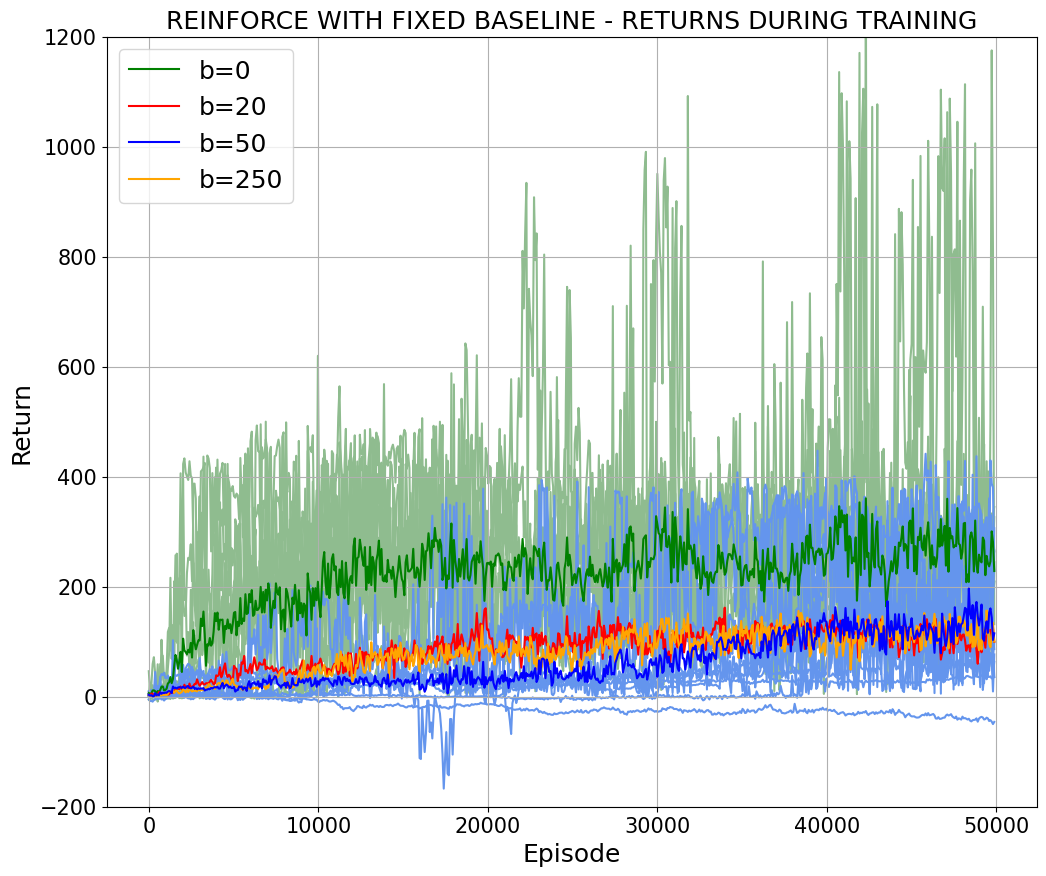

In [ ]:
n_episodes=50000
baselines=[0, 20, 50, 250] #0, 10, 20, 50, 100, 250
save_every=75

colors=['darkseagreen','plum','cornflowerblue','cornflowerblue','plum']
colors_dark=['green','red','blue','orange','darkviolet','orange']

plt.figure(figsize=(12,10))
plt.title('REINFORCE WITH FIXED BASELINE - RETURNS DURING TRAINING', fontsize=18)
for b in range(len(baselines)):
    avg_baseline=np.zeros((666,))
    sub_df = loaded_csv[(loaded_csv['n_episodes']==n_episodes) & (loaded_csv['baseline']==baselines[b])]
    for index, row in sub_df.iterrows():
        return_array = np.array(eval(row['returns']))
        avg_baseline+=return_array
        if baselines[b]==0 or baselines[b]==50:
            line_b0 = plt.plot(np.arange(len(return_array))*save_every, return_array, c=colors[b], zorder=0,label='_nolegend_')
    if baselines[b]==50: z=3
    else: z=2
    line_b0 = plt.plot(np.arange(len(avg_baseline))*save_every, avg_baseline/len(sub_df), c=colors_dark[b], zorder=z, label=f'b={baselines[b]}')
ax = plt.gca()
ax.set_ylim([-200, 1200])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Return', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
#plt.savefig('plots/Reinforce_FixedBaselines.png', dpi=300)
plt.show()


### Plot training times - Baselines b=0 and b=50

In [ ]:
n_episodes=50000
save_every=75
sub_df_b0 = loaded_csv[(loaded_csv['n_episodes']==n_episodes) & (loaded_csv['baseline']==0)]
sub_df_b50 = loaded_csv[(loaded_csv['n_episodes']==n_episodes) & (loaded_csv['baseline']==50)]
dfs=[sub_df_b0,sub_df_b50]
mod_names=['Reinforce baseline 0', 'Reinforce baseline 50']
baselines=[0,50]

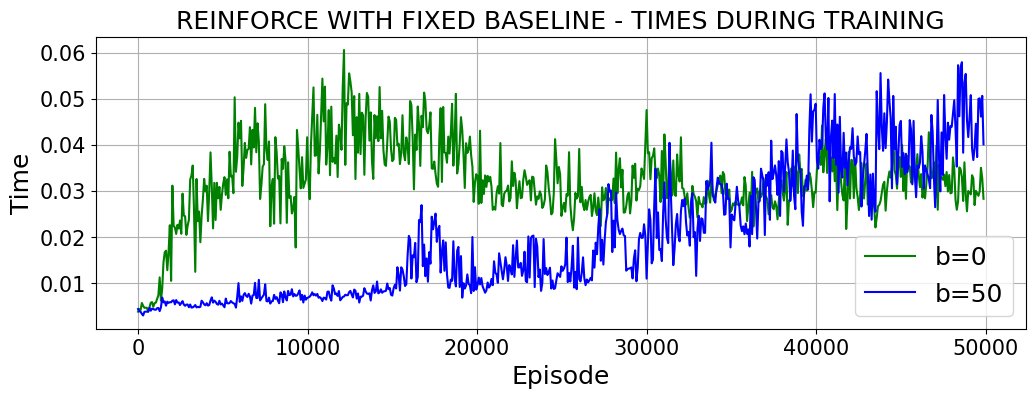

In [ ]:
colors=['darkseagreen','mistyrose','plum','cornflowerblue','cornflowerblue','plum'] #thistle']
colors_dark=['green','blue','blue','orange','darkviolet','orange']

plt.figure(figsize=(12,4))
plt.tight_layout()
plt.title('REINFORCE WITH FIXED BASELINE - TIMES DURING TRAINING', fontsize=18)
for b, df in enumerate(dfs):
    avg_time=np.zeros((666,))
    for index, row in df.iterrows():
        time_array = np.array(eval(row['times']))
        time_array[time_array < 0] = 0
        avg_time+=time_array
        #if baselines[b]==0 or baselines[b]==50:
        #line_b0 = plt.plot(np.arange(len(time_array))*save_every, time_array, c=colors[b], zorder=0,label='_nolegend_')
    if baselines[b]==50: z=3
    else: z=2
    line_b0 = plt.plot(np.arange(len(avg_time))*save_every, avg_time/len(df), c=colors_dark[b], zorder=z, label=f'b={baselines[b]}')
ax = plt.gca()
#ax.set_ylim([0, 0.1])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig('plots/Reinforce_FixedBaselines_times.png', dpi=300)
plt.show()


### Test - Baselines b=0 and b=50

In [ ]:
means=[]
stds=[]
for i, df in enumerate(dfs):
    tot_returns=[]
    for index, row in df.iterrows():
        model_name=index+'.mdl'
        print(model_name)
        random_seed = row['random_state']
        returns = rac.test(0, model_name, hopper='S', n_episodes=50, render=False, gamma=0.99, optim_lr=1e-3, layer_size=64, random_state=random_seed, device='cpu')
        tot_returns.append(returns)
    means.append(np.array(tot_returns).mean())
    stds.append(np.array(tot_returns).std(axis=1).mean())
print(type(returns))

Reinforce_50000_b0_hS_rs42_250529_07-31-19.mdl
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 205.8559759195592
Episode: 1 | Return: 207.10484463937016
Episode: 2 | Return: 291.04149469651355
Episode: 3 | Return: 303.451894147447
Episode: 4 | Return: 259.74915779842047
Episode: 5 | Return: 259.8167821438943
Episode: 6 | Return: 220.67085899140736
Episode: 7 | Return: 251.59315723009473
Episode: 8 | Return: 318.72053860994174
Episode: 9 | Return: 299.62320029683633
Episode: 10 | Return: 174.835160571227
Episode: 11 | Return: 334.02552811015084
Episode: 12 | Return: 202.1501457971136
Episode: 13 | Return: 288.12113373594286
Episode: 14 | Return: 242.29491944373652
Episode: 15 | Return: 426.77658319652403
Episode: 16 | Return: 165.11779337737144
Episode:

In [ ]:
for i, df in enumerate(dfs):
    print(mod_names[i])
    print('Mean:', means[i])
    print('Std:', stds[i])
    print()

Reinforce baseline 0
Mean: 288.57008477828794
Std: 77.97903018917087

Reinforce baseline 50
Mean: 131.8794734068859
Std: 41.81030253743474

